In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys as sys

# https://stackoverflow.com/questions/40887753/display-matrix-values-and-colormap

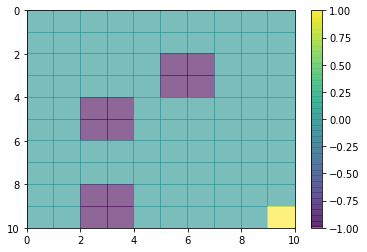

In [2]:
#Q1

ReFunc1 =[[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,-1,-1,0,0,0],[0,0,0,0,0,-1,-1,0,0,0],
          [0,0,-1,-1,0,0,0,0,0,0],[0,0,-1,-1,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
          [0,0,-1,-1,0,0,0,0,0,0],[0,0,-1,-1,0,0,0,0,0,1]]

ReFunc2 =[[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,-100,-100,-100,0,0,0],
          [0,0,0,0,-100,0,-100,0,0,0],[0,0,0,0,-100,0,-100,-100,-100,0],
          [0,0,0,0,-100,0,0,0,-100,0],[0,0,0,0,-100,0,0,0,-100,0],
          [0,0,0,0,-100,0,0,0,-100,0],[0,0,0,0,0,0,-100,-100,-100,0],
          [0,0,0,0,0,0,-100,0,0,0],[0,0,0,0,0,0,0,0,0,10]]
# ReFunc2 = np.rot90(ReFunc2)
# ReFunc1 = np.asmatrix(ReFunc1)
plt.pcolor(ReFunc1, alpha = 0.6)
plt.gca().invert_yaxis()
plt.colorbar()


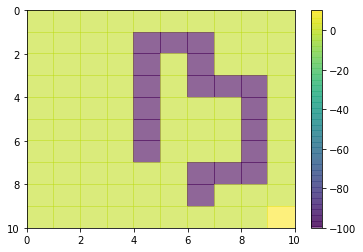

In [3]:
plt.pcolor(ReFunc2, alpha = 0.6)
plt.gca().invert_yaxis()
plt.colorbar()

In [4]:
#Q2

values = [[0 for i in range(10)] for i in range(10)]
moves = ['L', 'R', 'U', 'D']

In [5]:
class environment():
    def __init__(self,rewards,  epsilon= 0.01, w = 0.1):
        self.values = [[0 for i in range(10)] for i in range(10)]
        self.moves = ['L', 'R', 'U', 'D']
        self.rewards = rewards
        self.delta = sys.maxsize 
        self.epsilon = epsilon
        self.policies = [[0 for i in range(10)] for i in range(10)]
        self.w = w
    def reset():
        self.values = [[0 for i in range(10)] for i in range(10)]
        self.policies = [[0 for i in range(10)] for i in range(10)]

    def estimation(self,states):
        while self.delta > self.epsilon:
            self.delta = 0
            for x in range(len(states)):
                for y in range(len(states[x])):
#                     value_temp = self.values[x][y]
                    maxn = []
                    for move in self.moves:
                        maxn.append(self.eval_direction(x,y,move, self.w,0.8))
                    maxnumb = max(maxn)                    
                    self.delta = max(self.delta, abs(self.values[x][y] - maxnumb))
                    self.values[x][y] = maxnumb
                    


    def estimation_policy(self,states):
        
        for x in range(len(states)):
            for y in range(len(states[x])):
                maxn = []
                directions = [(x-1,y),(x+1,y),(x,y+1),(x,y-1)]

                for i, move in enumerate(self.moves):
                    maxn.append([self.eval_direction(x,y,move, self.w,0.8), move])
                maxnumb = max(maxn, key = lambda x :x[0])    
                self.policies[x][y] = maxnumb[1]    

        
    def eval_direction(self,x,y,direction,w ,discount):
        # probabilities indexed by left, right, up, down
        probabilities = [w/4,w/4,w/4,w/4]
        # when encoutering edge cases, direction off the grid will be replaced with staying in same block
        directions = [(x-1,y),(x+1,y),(x,y+1),(x,y-1)]
        sumn = []
        if x > 0 and x <9 and y > 0 and y < 9:


            if direction == 'L':
                probabilities[0] = 1-w+w/4
            elif direction == 'R':
                probabilities[1] = 1-w+w/4
            elif direction == 'U':
                probabilities[2] = 1-w+w/4
            elif direction == 'D':
                probabilities[3] = 1-w+w/4


        elif (x == 0 and y == 0) or (x == 0 and y == 9) or (x == 9 and y == 0) or (x == 9 and y == 9):
            if (x == 0 and y == 0):
                directions[0] = (x,y)
                directions[3] = (x,y)
                if direction == 'L' or direction == 'D':
                    probabilities[0] = 1-w+w/4+w/4
                    probabilities[3] = 0
                elif direction == 'R':
                    probabilities[1] = 1-w+w/4
                elif direction == 'U':
                    probabilities[2] = 1-w+w/4
            elif (x == 0 and y == 9):
                directions[0] = (x,y)
                directions[2] = (x,y)
                if direction == 'L' or direction == 'U':
                    probabilities[0] = 1-w+w/4+w/4
                    probabilities[2] = 0
                elif direction == 'R':
                    probabilities[1] = 1-w+w/4
                elif direction == 'D':
                    probabilities[3] = 1-w+w/4
            elif  (x == 9 and y == 0):
                directions[1] = (x,y)
                directions[3] = (x,y)
                if direction == 'R' or direction == 'D':
                    probabilities[1] = 1-w+w/4+w/4
                    probabilities[3] = 0
                elif direction == 'L':
                    probabilities[0] = 1-w+w/4
                elif direction == 'U':
                    probabilities[2] = 1-w+w/4
            elif  (x == 9 and y == 9):            
                directions[1] = (x,y)
                directions[2] = (x,y)
                if direction == 'R' or direction == 'U':
                    probabilities[1] = 1-w+w/4+w/4
                    probabilities[2] = 0
                elif direction == 'L':
                    probabilities[0] = 1-w+w/4
                elif direction == 'D':
                    probabilities[3] = 1-w+w/4

        else:
            if direction == 'L':
                probabilities[0] = 1-w+w/4
            elif direction == 'R': 
                probabilities[1] = 1-w+w/4
            elif direction == 'U':
                probabilities[2] = 1-w+w/4
            elif direction == 'D':
                probabilities[3] = 1-w+w/4 


            if x-1 < 0:
                directions[0] = (x,y)
            elif x+1 > 9:
                directions[1] = (x,y)
            elif y+1 > 9:
                directions[2] = (x,y)
            elif y-1 < 0:
                directions[3] = (x,y)
        for x, direction in enumerate(directions): 
#             print(x,direction)
            sumn.append(probabilities[x] * (self.rewards[direction[0]][direction[1]]+ discount*self.values[direction[0]][direction[1]]))


        return sum(sumn)    
        

        
        
        
        


In [6]:

def plot_optimal_policy(policy, epsilon = 0.01, w = 0.1):
    q2 = environment(policy, epsilon, w)
    q2.estimation(values)
    q2.values =  np.rot90(np.rot90(np.rot90(q2.values)))
    q2.rewards = np.rot90(np.rot90(np.rot90(q2.rewards)))
    # q2.values=[x[::-1] for x in q2.values] 
    q2.estimation_policy(values)
    # print(q2.policies)
    # print(q2.values)

    fig, ax = plt.subplots()

    min_val, max_val = 0, 10
    
    for i in range(10):
        for j in range(10):
            if q2.policies[i][j] == 'U':
                c = '⇧'
            elif q2.policies[i][j] == 'D':
                c = '⇩'
            elif q2.policies[i][j] == 'R':
                c = '⇨'
            elif q2.policies[i][j] == 'L':
                c = '⇦'
            ax.text(i+0.5, j+0.5, str(c), va='center', ha='center')
# plt.gca().invert_yaxis()

# plt.matshow(q2.values)
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.grid()
    xticks = range(max_val+1)
    plt.xticks(xticks)
    plt.yticks(xticks, xticks[::-1])
    ax.xaxis.tick_top()



In [7]:
def plot_values(policy, epsilon = 0.01, w = 0.1 , roundNumb = 3):
    q2 = environment(policy,epsilon ,w )
    q2.estimation(values)
    q2.values =  np.rot90(np.rot90(np.rot90(q2.values)))
    q2.rewards = np.rot90(np.rot90(np.rot90(q2.rewards)))
    # q2.values=[x[::-1] for x in q2.values] 
    q2.estimation_policy(values)
    # print(q2.policies)
    # print(q2.values)

    fig, ax = plt.subplots()

    min_val, max_val = 0, 10

    min_val, max_val = 0, 10
    for i in range(10):
        for j in range(10):
            c = round(q2.values[i][j], roundNumb)
            ax.text(i+0.5, j+0.5, str(c), va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)

    ax.grid()
    xticks = range(max_val+1)
    plt.xticks(xticks)
    plt.yticks(xticks, xticks[::-1])
    ax.xaxis.tick_top()
def plot_heatmap(policy, epsilon =0.01, w=0.1 , alphaA = 0.9):
    q2 = environment(policy, epsilon ,w )
    q2.estimation(values)
    #ax.xaxis.tick_top()
    plt.pcolor(q2.values, alpha= alphaA )
    plt.gca().invert_yaxis()
    plt.colorbar()
   

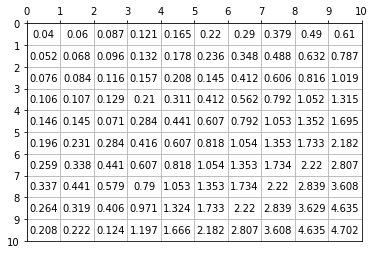

In [8]:
#q2
plot_values(ReFunc1)

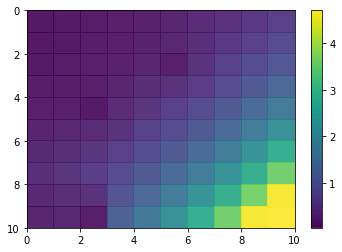

In [9]:
#q3
plot_heatmap(ReFunc1)

In [10]:
#q4 - analysis

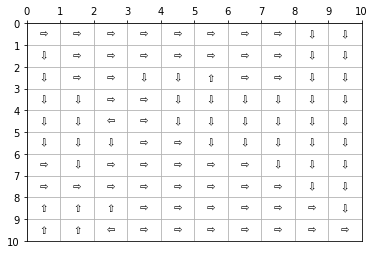

In [11]:
#q5
plot_optimal_policy(ReFunc1)
# plot_optimal_policy(ReFunc2)


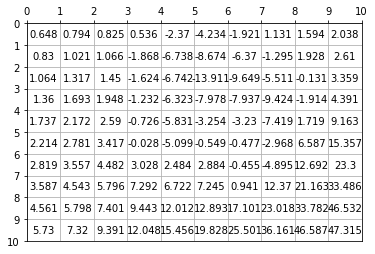

In [12]:
plot_values(ReFunc2)
# Question 6

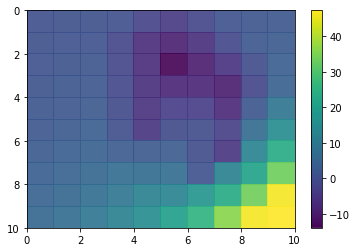

In [13]:
#q7

plot_heatmap(ReFunc2)

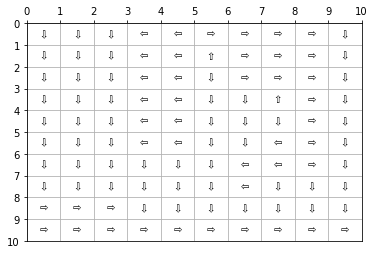

In [14]:
#q8

plot_optimal_policy(ReFunc2)


Reward Function 1 , w =0.6


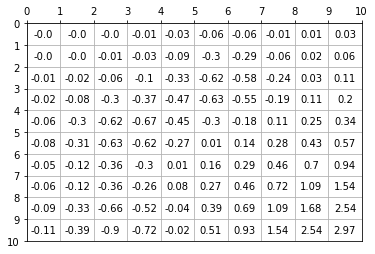

In [15]:
#q9
print("Reward Function 1 , w =0.6")
plot_values(ReFunc1,w=0.6, roundNumb = 2)


Reward Function 1 , w =0.6


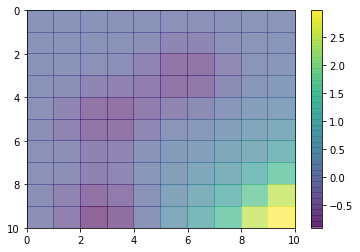

In [16]:
print("Reward Function 1 , w =0.6")
plot_heatmap(ReFunc1, w=0.6, alphaA=0.6)



Reward Function 1 , w =0.6


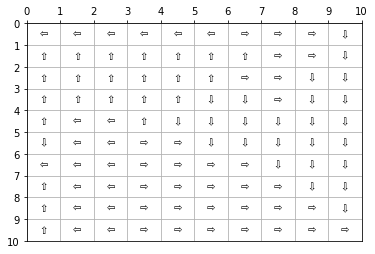

In [17]:
print("Reward Function 1 , w =0.6")

plot_optimal_policy(ReFunc1,w=0.6)

Reward Function 2 , w =0.6


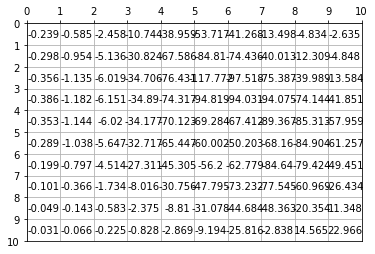

In [18]:
print("Reward Function 2 , w =0.6")
plot_values(ReFunc2,w=0.6)


Reward Function 2 , w =0.6


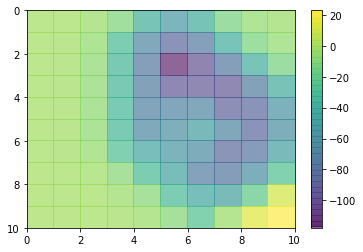

In [19]:
print("Reward Function 2 , w =0.6")

plot_heatmap(ReFunc2, w=0.6, alphaA=0.6)



Reward Function 2 , w =0.6


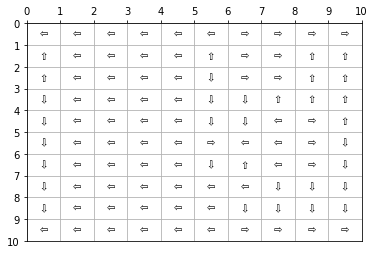

In [20]:
print("Reward Function 2 , w =0.6")

plot_optimal_policy(ReFunc2,w=0.6)